<a href="https://colab.research.google.com/github/sourojita08/CODSOFT/blob/main/CODSOFT_TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IRIS FLOWER CLASSIFICATION (CODSOFT TASK-3)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

Importing Dataset and Information

In [2]:
df=pd.read_csv("IRIS.csv")

In [3]:
df.head(16)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#checking for null values
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [8]:
n = len(df[df['species'] == 'Iris-versicolor'])
print("No of Versicolor in Dataset:",n)

No of Versicolor in Dataset: 50


In [9]:
n1 = len(df[df['species'] == 'Iris-virginica'])
print("No of Virginica in Dataset:",n1)

No of Virginica in Dataset: 50


In [10]:
n2 = len(df[df['species'] == 'Iris-setosa'])
print("No of Setosa in Dataset:",n2)

No of Setosa in Dataset: 50


**Data Visualizations (EDA)**

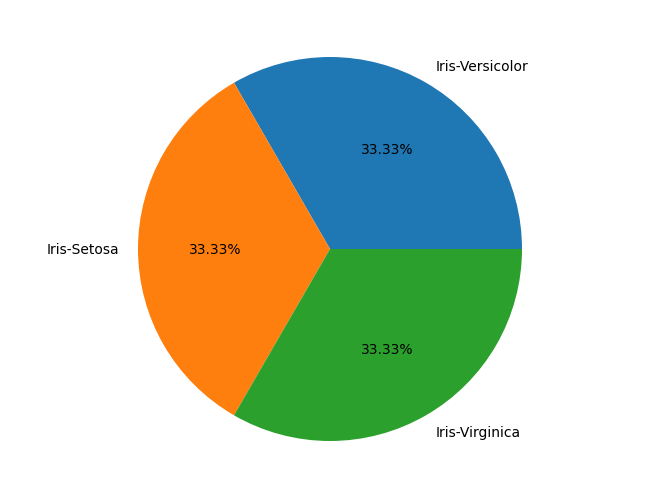

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Iris-Versicolor', 'Iris-Setosa', 'Iris-Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

<ipython-input-12-b52a60673138>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="species", data=df, palette="plasma")


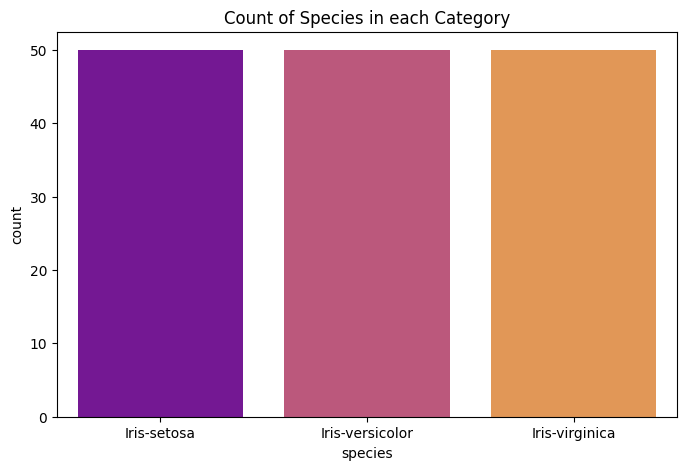

In [12]:
#the species (categorical) data:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="species", data=df, palette="plasma")
plt.title('Count of Species in each Category')
plt.show()

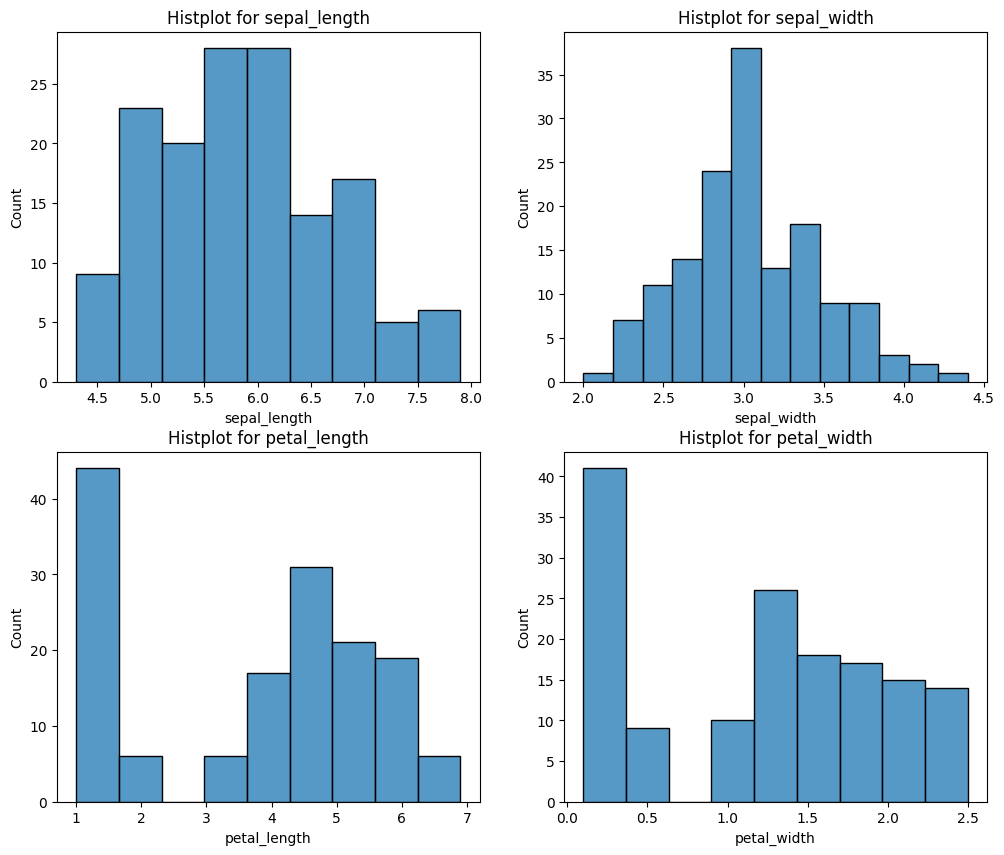

In [13]:
#the numerical columns data:
num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.figure(figsize=(12,10))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.histplot(x=df[num_cols[i]])
    plt.title(f'Histplot for {num_cols[i]}')

plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

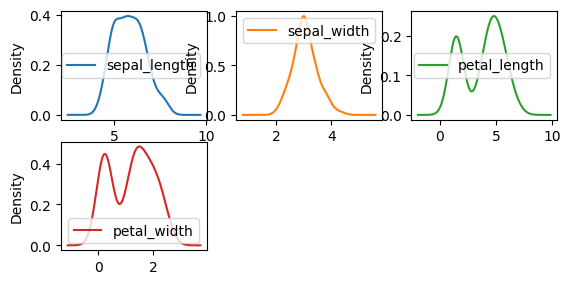

In [14]:
df.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)

In [15]:
colors=['red','blue','green']
species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

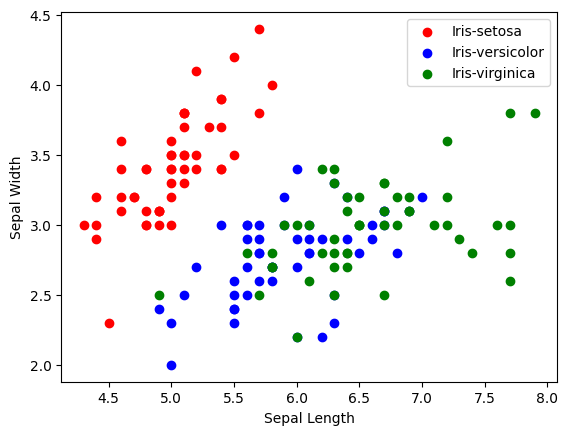

In [16]:
#sepal length vs. sepal width
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

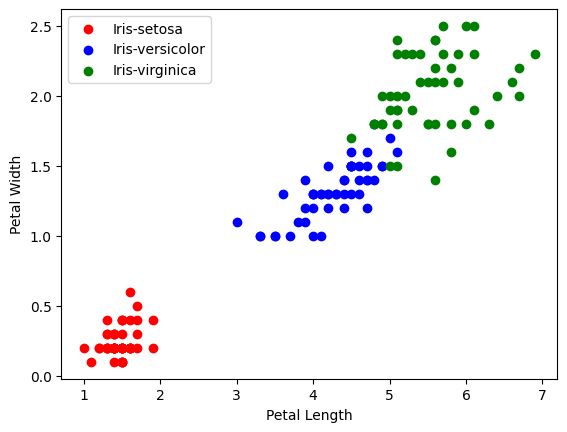

In [17]:
#petal length vs. petal width
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

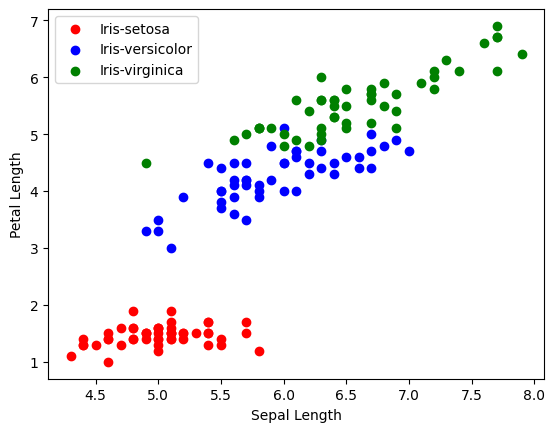

In [18]:
#sepal length vs. petal length
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

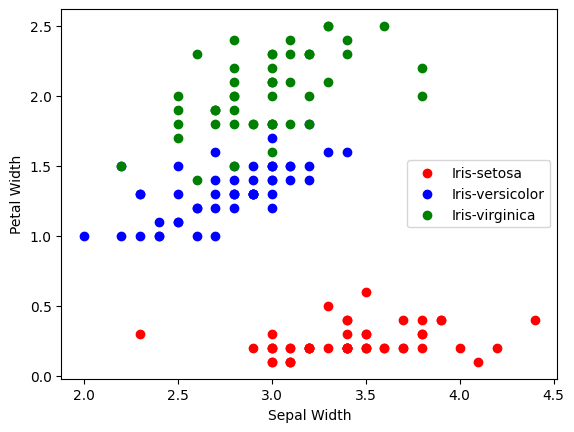

In [19]:
#sepal widgth vs. petal width
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [20]:
# replace strings with numericals
df["species"].replace({"Iris-setosa":0 , "Iris-versicolor":1 , "Iris-virginica":2} , inplace = True)
df

<ipython-input-20-a70a23d5bf15>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["species"].replace({"Iris-setosa":0 , "Iris-versicolor":1 , "Iris-virginica":2} , inplace = True)
<ipython-input-20-a70a23d5bf15>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["species"].replace({"Iris-setosa":

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


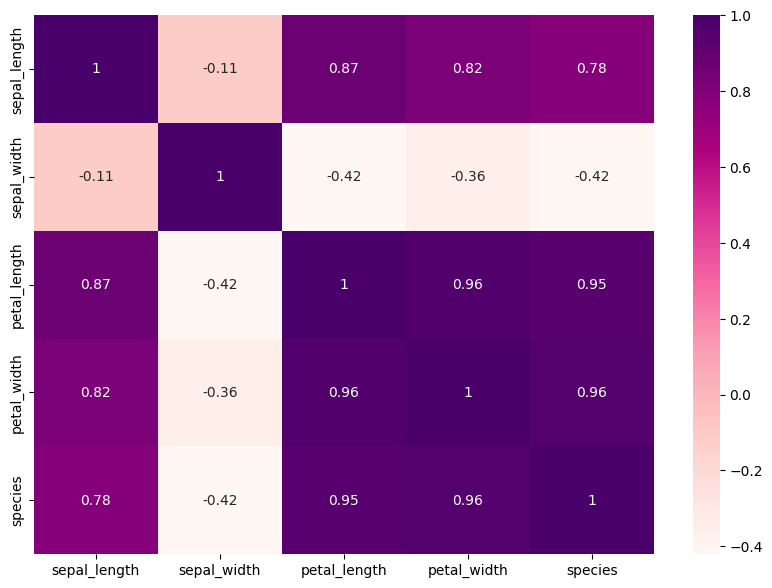

In [21]:
#Species Measurements Correlation
fig,axis=plt.subplots(figsize=(10,7))
dataplot = sns.heatmap(df.corr(), cmap="RdPu", annot=True)
plt.show()

<Figure size 400x300 with 0 Axes>

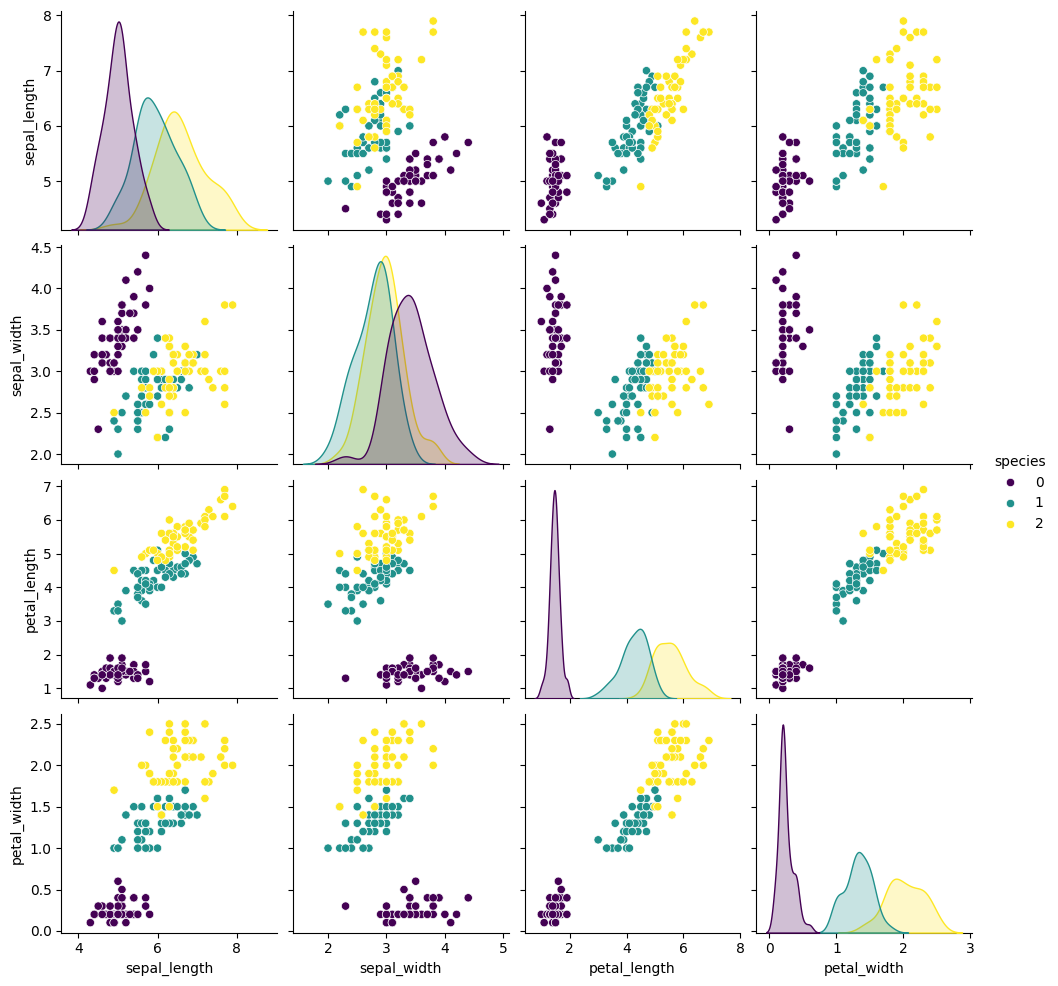

In [22]:
plt.figure(figsize=(4, 3))
sns.pairplot(df, hue='species', palette='viridis')
plt.show()

**Model Training & Accuracy**

In [23]:
#creating target and learning variables
X = df[["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]]
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [24]:
y = df["species"]
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [25]:
# splitting the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [26]:
#Linear Regression
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred = LR.predict(X_test)
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 97.78%


In [28]:
#K Nearest Neighbors
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [29]:
classifier_knn = KNeighborsClassifier(n_neighbors = 1)
classifier_knn.fit(X_train,y_train)
pred = classifier_knn.predict(X_test)
KNNAcc = accuracy_score(y_test, pred)
print('K-Nearest Neighbors Classifier accuracy: {:.2f}%'.format(KNNAcc*100))

K-Nearest Neighbors Classifier accuracy: 97.78%


In [30]:
#Decision Tree Classifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
y_pred = DT.predict(X_test)
DTCAcc = accuracy_score(y_test, y_pred)
print('Decision Tree Classifier accuracy: {:.2f}%'.format(KNNAcc*100))

Decision Tree Classifier accuracy: 97.78%


In [32]:
#Random Forest Classifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_pred = RF.predict(X_test)
RFCAcc = accuracy_score(y_test, y_pred)
print('Random Forest Classifier accuracy: {:.2f}%'.format(RFCAcc*100))

Random Forest Classifier accuracy: 97.78%


In [34]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','Decision Tree','Random Forest'],
    'Score': [97.78, 97.78, 97.78, 97.78]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
97.78,Logistic Regression
97.78,KNN
97.78,Decision Tree
97.78,Random Forest
